In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
''' Author: Lucas Rath

This script plots the learned equations from the BO experiments
It plots the learned equations for the best, worst, and median runs for each method and experiment.
'''

import sys,os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pathlib import Path
import yaml, json
from tqdm import tqdm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.mplot3d import Axes3D

sys.path.append(os.path.join(os.getcwd(),'..'))
from CBOSS.models import models

2024-03-01 17:29:49,067 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [3]:
cdir = Path(os.getcwd()) # Path(__file__).parent 
config_file_path = cdir/'..'/'configs_equation_discovery.yaml'
results_folder = cdir.parent / 'results'
n_images = 4

# create folder for saving figures
img_folder = results_folder/'images'
img_folder.mkdir(exist_ok=True, parents=True)

exps = dict(
    NLDO    = dict(cfg='NonLinearDampedOscillator_k5', title='Nonlinear Damped Oscillator', ylim=[-0.95, -0.45], gl=['NonLinearDampedOscillator_k5/main*/']),
    SEIR    = dict(cfg='SEIR_k3',                      title='SEIR',                        ylim=[-1.6, 0.],     gl=['SEIR_k3/main*/']), 
    CylWake = dict(cfg='CylinderWake_k3',              title='Cylinder Wake',               ylim=[-1.3, 0.0],    gl=['CylinderWake_k3/main*/']), 
    Lorenz  = dict(cfg='Lorenz_k3',                    title='Lorenz Oscillator',           ylim=[-0.2, 0.0],    gl=['Lorenz_k3/main*/']), 
    # Chua    = dict(cfg='ChuaOscillator_k3',            title='Chua Oscillator',             ylim=[-0.18, -0.06], gl=['ChuaOscillator_k3/main*/']),
)

In [4]:

with open(config_file_path, 'r') as f:
    cfg = yaml.safe_load(f)

data = dict()
for exp_name, exp in tqdm(exps.items()):

    data[exp_name] = dict()
    
    ''' Init model
    '''
    cfg_exp = cfg[exp['cfg']]
    model_Cls    = cfg_exp['model_name']
    model_kwargs = cfg_exp['model']['kwargs']
    Model = getattr(models, model_Cls)
    randomstate = np.random.RandomState(cfg_exp['model']['random_seed_init_dataset'])
    model = Model(**model_kwargs, random_generator=randomstate)
    
    exp['Z_true'] = model.Z_true
    exp['t'] = model.t_eval

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:39<00:00,  9.97s/it]


In [5]:
sns.set_style('darkgrid')
plt.rcParams.update({
    'axes.facecolor': 'none',
    'lines.linewidth': 1.5,
    'grid.color': 'lightgray',
    'legend.facecolor': '#EAEAF2',
    'figure.constrained_layout.use': False
})

alpha = 0.8

In [6]:
model.t_eval

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.997e+01, 1.998e+01,
       1.999e+01])

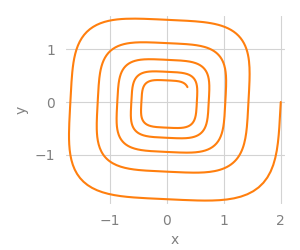

In [7]:
exp_name = 'NLDO'
figname = f'{img_folder}/{exp_name}__measurement'
Z, t = exps[exp_name]['Z_true'], exps[exp_name]['t']

fig = plt.figure(figsize=(3,2.5))
ax = fig.add_subplot(111)

# ax.plot(*Z_true.T, label='measurement', alpha=alpha, color='tab:orange')
colored = False

if colored:
    norm = plt.Normalize(t.min(), t.max())
    points = np.array([Z[:,0], Z[:,1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='autumn', norm=norm)
    # Set the values used for colormapping
    lc.set_array(t)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
else:
    ax.plot(*Z.T, label='measurement', color='tab:orange')

limits = np.array([[Z[:,0].min(), Z[:,0].max()], [Z[:,1].min(), Z[:,1].max()]])
ranges = limits[:,1] - limits[:,0]
ax.set_xlim(limits[0,:] + 0.02*np.array([-1, 1])*ranges[0])
ax.set_ylim(limits[1,:] + 0.02*np.array([-1, 1])*ranges[1])
# ax.set_xlim([Z[:,0].min()*1.05, Z[:,0].max()*1.05] + np.array([]))
# ax.set_ylim([Z[:,1].min()*1.05, Z[:,1].max()*1.05])
ax.set_xlabel('x', color='grey'), ax.set_ylabel('y', color='grey')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
plt.tight_layout(rect=[-0.0, -0.05, 1.0, 1.])
fig.savefig(f'{figname}.png', dpi=200)
fig.savefig(f'{figname}.svg')

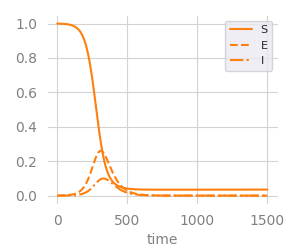

In [8]:
exp_name = 'SEIR'
figname = f'{img_folder}/{exp_name}__measurement'
Z, t = exps[exp_name]['Z_true'], exps[exp_name]['t']

fig = plt.figure(figsize=(3,2.5))
ax = fig.add_subplot(111)

colored = False

if colored:
    plot_args = [['tab:orange','tab:orange','tab:orange'], ['S', 'E', 'I'], ['-', '--', '-.']]
else:
    plot_args = [['tab:orange','tab:orange','tab:orange'], ['S', 'E', 'I'], ['-', '--', '-.']]
    
    
# for i, (color, label, ls) in enumerate(zip( ['tab:blue','tab:orange','tab:green'], ['S', 'E', 'I'], ['-', '-', '-'])): # ['-', '--', '-.']
for i, (color, label, ls) in enumerate(zip(*plot_args)): # 
    ax.plot(Z[:,i], label=label, alpha=1.0, color=color, linestyle=ls)
    # ax.annotate('local max', xy=(2, 1))
ax.set_xlabel('time', color='grey')
# ax.set_ylabel('population')
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
plt.tight_layout(rect=[-0.0, -0.05, 1.0, 1.])
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=8)
fig.savefig(f'{figname}.png', dpi=200)
fig.savefig(f'{figname}.svg')

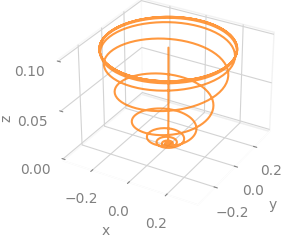

2024-03-01 17:30:30,138 [WARNING] No such comm: 2254b4bf1df84f6b9cfbaf415a35b19c


In [9]:
exp_name = 'CylWake'
figname = f'{img_folder}/{exp_name}__measurement'
Z, t = exps[exp_name]['Z_true'], exps[exp_name]['t']

fig = plt.figure(figsize=(3, 2.5))
ax = fig.add_subplot(111, projection='3d')

colored = False

if colored:
    norm = plt.Normalize(t.min(), t.max())
    points = np.array([Z[:,0], Z[:,1], Z[:,2]]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    n = len(points)

    cmap=plt.get_cmap('autumn')
    colors=[cmap(float(ii)/(n-1)) for ii in range(n-1)]

    for ii in range(n-1):
        segii=segments[ii]
        lii,=ax.plot(segii[:,0],segii[:,1],segii[:,2],color=colors[ii],linewidth=1)
        #lii.set_dash_joinstyle('round')
        #lii.set_solid_joinstyle('round')
        lii.set_solid_capstyle('round')
else:
    ax.plot3D(*Z.T, label='measurement', alpha=alpha, color='tab:orange')
    
ax.set_xlabel('x', color='grey'), ax.set_ylabel('y', color='grey'), ax.set_zlabel('z', color='grey', rotation=90)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
ax.zaxis.labelpad = 1.0
ax.zaxis._axinfo['juggled'] = (1,2,0)
ax.set_zticks(np.round(np.linspace(0, 0.1, 3), 2))
# plt.locator_params(axis='z', nbins=4)
# ax.zaxis.set_major_locator(plt.MaxNLocator(3))
# plt.tight_layout()
plt.tight_layout(rect=[0.10, 0, 1.0, 1.2])
fig.savefig(f'{figname}.png', dpi=200)
fig.savefig(f'{figname}.svg')

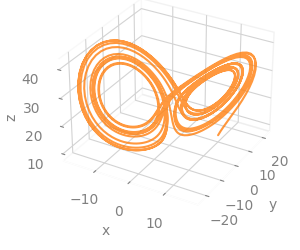

In [11]:
exp_name = 'Lorenz'
figname = f'{img_folder}/{exp_name}__measurement'
Z, t = exps[exp_name]['Z_true'], exps[exp_name]['t']

plt.close()
fig = plt.figure(figsize=(3, 2.5))
ax = fig.add_subplot(111, projection='3d')

colored = False

if colored:
    norm = plt.Normalize(t.min(), t.max())
    points = np.array([Z[:,0], Z[:,1], Z[:,2]]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    n = len(points)

    cmap=plt.get_cmap('autumn')
    colors=[cmap(float(ii)/(n-1)) for ii in range(n-1)]

    for ii in range(n-1):
        segii=segments[ii]
        lii,=ax.plot(segii[:,0],segii[:,1],segii[:,2],color=colors[ii],linewidth=1)
        #lii.set_dash_joinstyle('round')
        #lii.set_solid_joinstyle('round')
        lii.set_solid_capstyle('round')
else:
    ax.plot3D(*Z.T, label='measurement', alpha=alpha, color='tab:orange')
    

ax.set_xlabel('x', color='grey'), ax.set_ylabel('y', color='grey'), ax.set_zlabel('z', color='grey', rotation=90)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
ax.zaxis.labelpad = -1.0
ax.zaxis._axinfo['juggled'] = (1,2,0)
# plt.tight_layout()
plt.tight_layout(rect=[0.10, 0, 1.0, 1.2])
fig.savefig(f'{figname}.png', dpi=200)
fig.savefig(f'{figname}.svg')
plt.show()
# plt.close()